In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import numpy as np

def discrete_convolution(x, h):
    """Computes the discrete-time convolution of two signals x[n] and h[n]."""
    N = len(x)
    M = len(h)
    y = np.zeros(N + M - 1)

    for n in range(N + M - 1):
        for k in range(M):
            if 0 <= n - k < N:
                y[n] += x[n - k] * h[k]
    
    return y

# Test with simple signals
x = [1, 2, 3, 4]  # Example input signal
h = [0.5, 1, 0.5]  # Example kernel
y = discrete_convolution(x, h)

print("Convolution result:", y)


Convolution result: [0.5 2.  4.  6.  5.5 2. ]


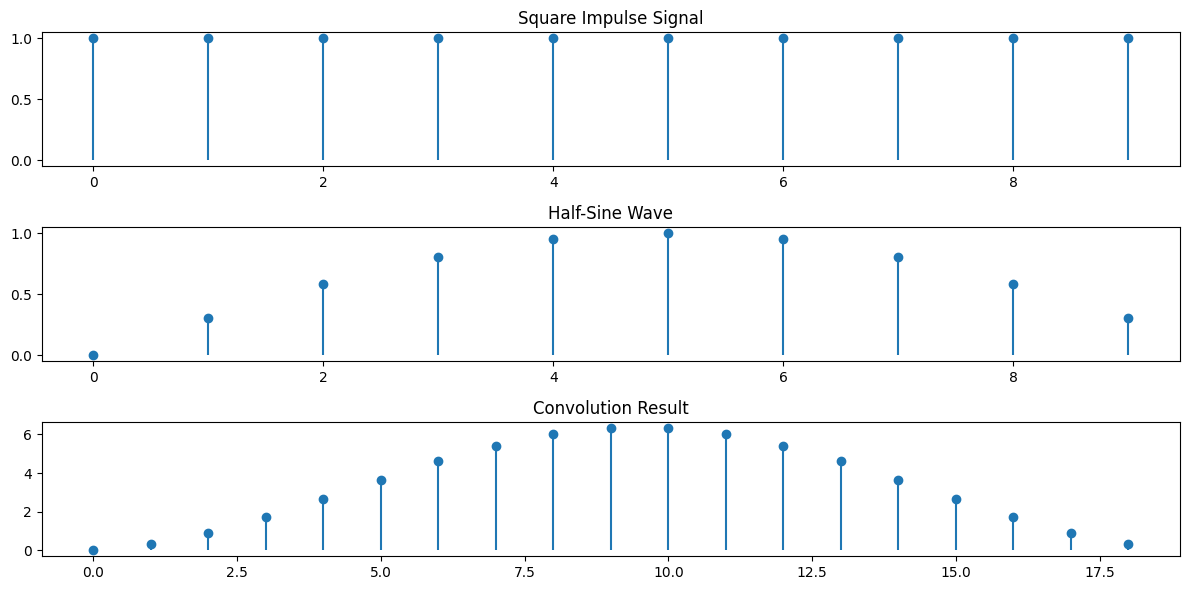

In [6]:
import matplotlib.pyplot as plt

# Generate a square impulse (length = 10)
square_impulse = np.ones(10)

# Generate a half-sine wave (same length)
n = np.arange(10)
half_sine = np.sin(np.pi * n / 10)

# Compute the convolution
#conv_result = np.convolve(square_impulse, half_sine, mode='full')
conv_result = discrete_convolution(square_impulse, half_sine)


# Plot signals
plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
plt.stem(square_impulse, basefmt=" ")
plt.title("Square Impulse Signal")

plt.subplot(3, 1, 2)
plt.stem(half_sine, basefmt=" ")
plt.title("Half-Sine Wave")

plt.subplot(3, 1, 3)
plt.stem(conv_result, basefmt=" ")
plt.title("Convolution Result")

plt.tight_layout()
plt.show()


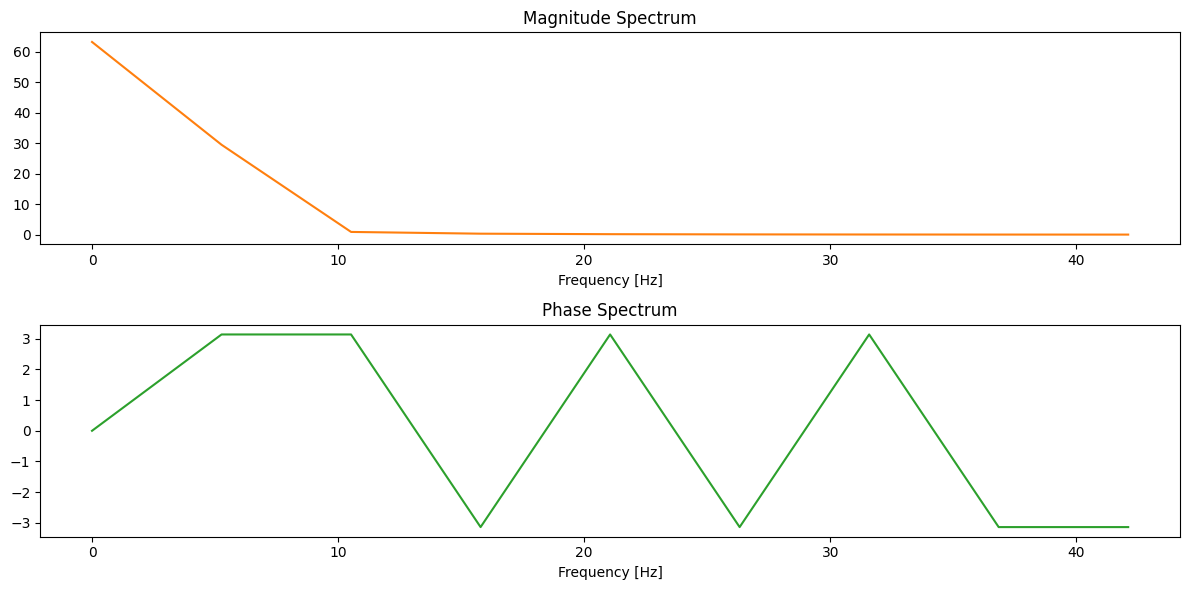

In [7]:
from scipy.fft import fft, fftfreq

N = len(conv_result)
fs = 100  # Assume 100 Hz sampling for visualization

fft_values = fft(conv_result)
freqs = fftfreq(N, 1/fs)

# Plot magnitude and phase spectra
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(freqs[:N//2], np.abs(fft_values[:N//2]), color='C1')
plt.title("Magnitude Spectrum")
plt.xlabel("Frequency [Hz]")

plt.subplot(2, 1, 2)
plt.plot(freqs[:N//2], np.angle(fft_values[:N//2]), color='C2')
plt.title("Phase Spectrum")
plt.xlabel("Frequency [Hz]")

plt.tight_layout()
plt.show()


In [8]:
from scipy.io import wavfile

# Read input audio file (BassTrack.wav)
fs, bass_track = wavfile.read("BassTrack.wav")

# Read kernel (SMGV30_2023_sm57.wav)
fs_k, kernel = wavfile.read("SMGV30_2023_sm57.wav")

# Convert to mono if stereo
if len(bass_track.shape) > 1:
    bass_track = np.mean(bass_track, axis=1)

if len(kernel.shape) > 1:
    kernel = np.mean(kernel, axis=1)

print(f"Bass Track: {bass_track.shape}, Kernel: {kernel.shape}")


Bass Track: (7034329,), Kernel: (6001,)


/tmp/ipykernel_10176/2733102148.py:4: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, bass_track = wavfile.read("BassTrack.wav")


In [9]:
from scipy.signal import convolve

# Perform convolution
output_signal = convolve(bass_track, kernel, mode='same')

# Normalize for playback
output_signal = np.int16(output_signal / np.max(np.abs(output_signal)) * 32767)

# Save the result
wavfile.write("output_convolved.wav", fs, output_signal)


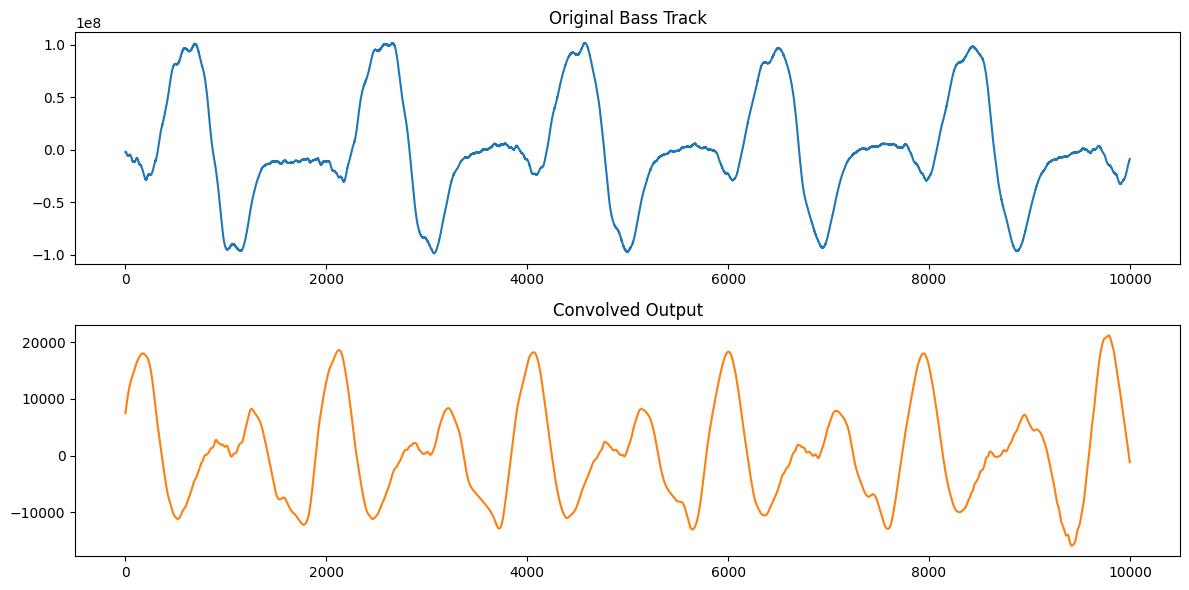

In [10]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(bass_track[:10000], color='C0')
plt.title("Original Bass Track")

plt.subplot(2, 1, 2)
plt.plot(output_signal[:10000], color='C1')
plt.title("Convolved Output")

plt.tight_layout()
plt.show()


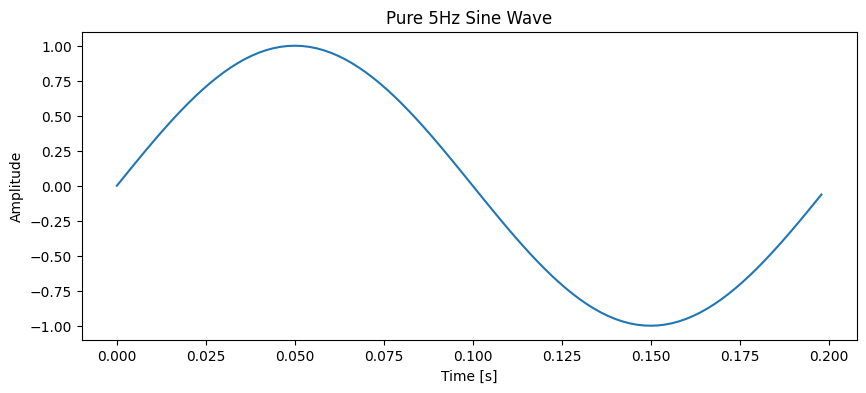

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
fs = 500  # Sampling frequency in Hz
f = 5  # Sine wave frequency in Hz
T = 2  # Duration in seconds

# Generate time vector
t = np.arange(0, T, 1/fs)

# Generate sine wave
sine_wave = np.sin(2 * np.pi * f * t)

# Plot the sine wave
plt.figure(figsize=(10, 4))
plt.plot(t[:100], sine_wave[:100], color='C0')  # Show only the first 100 samples
plt.title("Pure 5Hz Sine Wave")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()


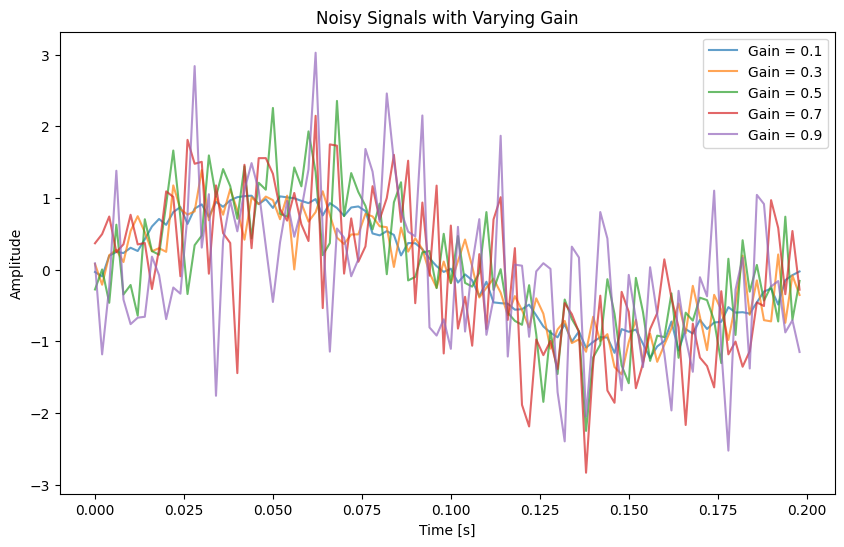

In [12]:
# Define noise gain
gain_values = np.linspace(0.1, 2, 10)  # Increasing noise levels

# Generate and plot noisy signals
plt.figure(figsize=(10, 6))

for i, gain in enumerate(gain_values[:5]):  # Show first 5 levels
    noisy_signal = sine_wave + gain * np.random.randn(len(sine_wave))
    plt.plot(t[:100], noisy_signal[:100], label=f"Gain = {gain:.1f}", alpha=0.7)

plt.title("Noisy Signals with Varying Gain")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.legend()
plt.show()


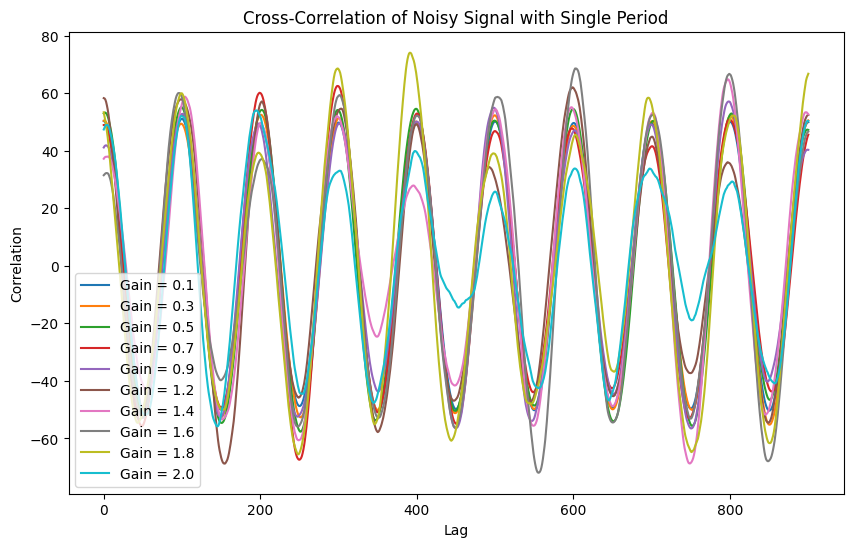

In [13]:
from scipy.signal import correlate

# Extract one period of the sine wave
period_samples = int(fs / f)  # Number of samples in one period
single_period = sine_wave[:period_samples]

# Compute correlation for increasing noise levels
plt.figure(figsize=(10, 6))

for gain in gain_values:
    noisy_signal = sine_wave + gain * np.random.randn(len(sine_wave))
    correlation = correlate(noisy_signal, single_period, mode="valid")
    plt.plot(correlation, label=f"Gain = {gain:.1f}")

plt.title("Cross-Correlation of Noisy Signal with Single Period")
plt.xlabel("Lag")
plt.ylabel("Correlation")
plt.legend()
plt.show()


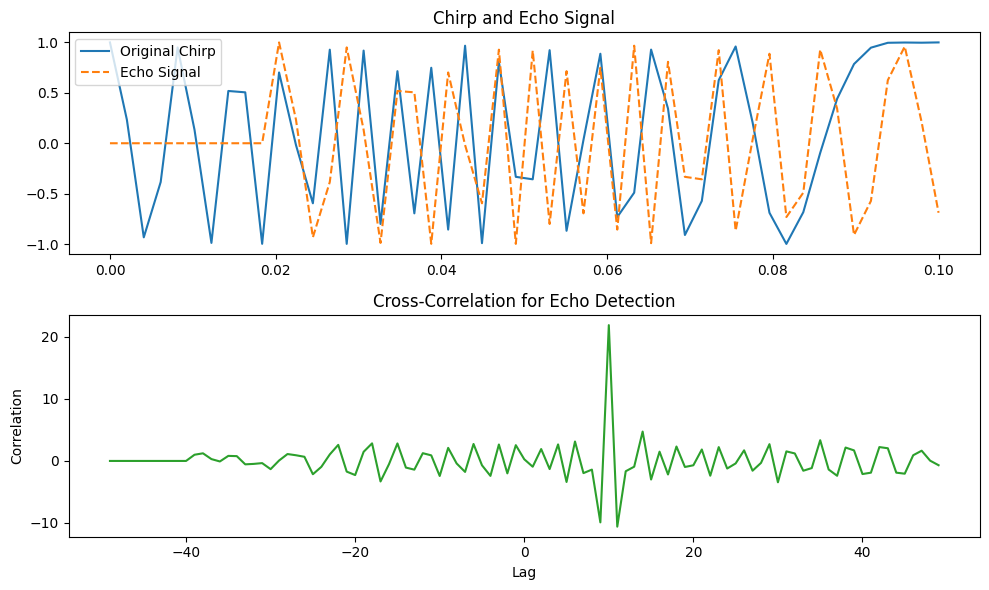

In [14]:
from scipy.signal import chirp

# Define chirp parameters
T_chirp = 0.1  # Chirp duration in seconds
t_chirp = np.linspace(0, T_chirp, int(fs * T_chirp))  # Chirp time vector
chirp_signal = chirp(t_chirp, f0=100, f1=500, t1=T_chirp, method='linear')  # Linear chirp

# Simulate echo with delay
delay_samples = int(0.02 * fs)  # 20ms delay
echo_signal = np.pad(chirp_signal, (delay_samples, 0), mode='constant')[:len(chirp_signal)]

# Compute correlation
correlation = correlate(echo_signal, chirp_signal, mode="full")
lags = np.arange(-len(chirp_signal) + 1, len(echo_signal))

# Plot chirp and correlation
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(t_chirp, chirp_signal, label="Original Chirp", color='C0')
plt.plot(t_chirp, echo_signal, label="Echo Signal", linestyle="dashed", color='C1')
plt.title("Chirp and Echo Signal")
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(lags, correlation, color='C2')
plt.title("Cross-Correlation for Echo Detection")
plt.xlabel("Lag")
plt.ylabel("Correlation")

plt.tight_layout()
plt.show()


In [15]:
# Estimate delay from correlation peak
peak_index = np.argmax(correlation)
estimated_delay = abs(lags[peak_index]) / fs  # Convert lag to time

# Compute distance
distance = (estimated_delay * 343) / 2
print(f"Estimated distance: {distance:.2f} meters")


Estimated distance: 3.43 meters


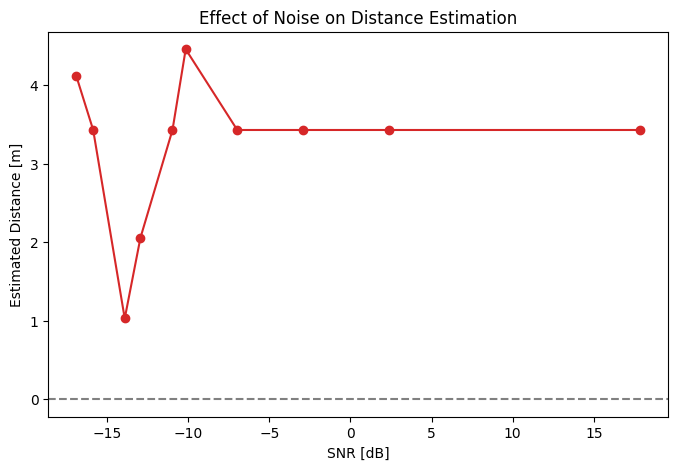

In [16]:
def compute_snr(signal, noise_gain):
    """Compute SNR given a signal and noise gain."""
    noise = noise_gain * np.random.randn(len(signal))
    signal_power = np.mean(signal**2)
    noise_power = np.mean(noise**2)
    return 10 * np.log10(signal_power / noise_power)

snr_values = []
distances = []

for gain in np.linspace(0.1, 5, 10):  # Increasing noise levels
    noisy_echo = echo_signal + gain * np.random.randn(len(echo_signal))
    correlation = correlate(noisy_echo, chirp_signal, mode="full")
    peak_index = np.argmax(correlation)
    estimated_delay = abs(lags[peak_index]) / fs
    estimated_distance = (estimated_delay * 343) / 2

    snr = compute_snr(chirp_signal, gain)
    snr_values.append(snr)
    distances.append(estimated_distance)

# Plot distance vs. SNR
plt.figure(figsize=(8, 5))
plt.plot(snr_values, distances, marker='o', color='C3')
plt.axhline(0, linestyle="dashed", color='gray')
plt.xlabel("SNR [dB]")
plt.ylabel("Estimated Distance [m]")
plt.title("Effect of Noise on Distance Estimation")
plt.show()
